In [1]:
import pandas as pd
import numpy as np 
import seaborn as sn
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import cross_val_score

In [2]:
def plot_coeffs(alphas,coefs,title):
  ax = plt.gca()
  ax.plot(alphas, coefs)
  #ax.set_xscale('log')
  ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
  plt.xlabel('degree')
  plt.ylabel('weights')
  plt.title(title)
  plt.axis('tight')
  plt.show()

In [3]:
def plot_rss(alphas,rss_values,rss_values_train,title):
  plt.plot(alphas,rss_values,color='blue',label='test')
  plt.scatter(alphas,rss_values,alpha=0.5,color='blue')
  
  plt.plot(alphas,rss_values_train,color='cyan',label='train')
  plt.scatter(alphas,rss_values_train,alpha=0.5,color='cyan')
  plt.legend(loc='upper left')
  plt.title(title)
  plt.xlabel("Alpha")
  plt.ylabel("RSS")
  plt.show()

In [4]:
def plot_rmse(alphas,all_rmse,all_rmse_train,title):
  plt.plot(alphas,all_rmse,color='red',label='test')
  plt.scatter(alphas,all_rmse,alpha=0.5,color='red')
  
  plt.plot(alphas,all_rmse_train,color='green',label='train')
  plt.scatter(alphas,all_rmse_train,alpha=0.5,color='green')
  plt.legend(loc='upper left')
  plt.title(title)
  plt.xlabel("Degree")
  plt.ylabel("RMSE")
  plt.show()

In [5]:
def plot_rmse_all_models(alphas,rmses,rmses_train):
  plt.scatter(alphas[1],rmses[1],color='red',label='elastic',alpha=0.5)
  plt.scatter(alphas[0],rmses[0],color='blue',label='ridge',alpha=0.5)
  plt.scatter(alphas[2],rmses[2],color='green',label='kernel',alpha=0.5)
  plt.legend(loc='upper left')
  plt.title('Best RMSE for all the models')
  plt.xlabel("Alpha")
  plt.ylabel("RMSE")
  plt.show()

In [6]:
def plot_predictions(x,y,title):
  plt.scatter(x,y,alpha=0.5)
  plt.title(title)
  plt.xlabel("Actual")
  plt.ylabel("Predicted")
  plt.show()

In [7]:
def model_evaluate_train( model_):
    pred_df = pd.DataFrame( { "actual": train_y, "predicted" : model_.predict( train_X ) } )
    pred_df['resid'] = pred_df.actual - pred_df.predicted
    rss = np.sum(np.square(pred_df.actual-pred_df.predicted))
    rmse = np.sqrt(mean_squared_error( pred_df.actual, pred_df.predicted ))
    r2 = r2_score( pred_df.actual, pred_df.predicted )
    #print( "RMSE: ", rmse, " : ", "R Squared: ", r2 )
    return rmse, r2, rss

In [8]:
def model_evaluate_train_kernel( model_):
    pred_df = pd.DataFrame( { "actual": train_new_y, "predicted" : model_.predict(train_new_X)})
    pred_df['resid'] = pred_df.actual - pred_df.predicted
    rss = np.sum(np.square(pred_df.actual-pred_df.predicted))
    rmse = np.sqrt(mean_squared_error( pred_df.actual, pred_df.predicted ))
    r2 = r2_score( pred_df.actual, pred_df.predicted )
    #print( "RMSE: ", rmse, " : ", "R Squared: ", r2 )
    return rmse, r2, rss

In [9]:
def model_evaluate( model_):
    pred_df = pd.DataFrame( { "actual": test_y, "predicted" : model_.predict( test_X ) } )
    pred_df['resid'] = pred_df.actual - pred_df.predicted
    rss = np.sum(np.square(pred_df.actual-pred_df.predicted))
    rmse = np.sqrt(mean_squared_error( pred_df.actual, pred_df.predicted ))
    r2 = r2_score( pred_df.actual, pred_df.predicted )
    #print( "RMSE: ", rmse, " : ", "R Squared: ", r2 )
    return pred_df, rmse, r2, rss

In [10]:
def model_evaluate_kernel( model_):
    pred_df = pd.DataFrame( { "actual": test_new_y, "predicted" : model_.predict( test_new_X) } )
    pred_df['resid'] = pred_df.actual - pred_df.predicted
    rss = np.sum(np.square(pred_df.actual-pred_df.predicted))
    rmse = np.sqrt(mean_squared_error( pred_df.actual, pred_df.predicted ))
    r2 = r2_score( pred_df.actual, pred_df.predicted )
    #print( "RMSE: ", rmse, " : ", "R Squared: ", r2 )
    return pred_df, rmse, r2, rss

In [11]:
def do_ridge_regression(train_X, test_X, train_y, test_y,alpha_val):
    ridge_clf = RidgeCV(alphas=[alpha_val],cv=10,normalize=True)
    ridge_clf.fit(train_X,train_y)
    ridge_pred_test, rmse_ridge_test, r2_ridge_test, rss_test = model_evaluate(ridge_clf)
    rmse_ridge_train, r2_ridge_train, rss_ridge_train = model_evaluate_train(ridge_clf)
    print("Ridge value for alpha :",alpha_val)
    print(rmse_ridge_test)
    print(rss_test)
    print(ridge_clf.alpha_)
    print(ridge_clf.coef_.shape)
    return ridge_pred_test, rmse_ridge_test, r2_ridge_test, rss_test, rmse_ridge_train, r2_ridge_train, rss_ridge_train, ridge_clf.coef_
    

In [12]:
def do_pca(original_data):
    pca = PCA(n_components=10, whiten=True)
    X = StandardScaler().fit_transform(original_data)
    X_pca = pca.fit_transform(X)
    print('Original number of features:', X.shape[1])
    print('Reduced number of features:', X_pca.shape[1])
    return X_pca

In [13]:
def do_kernel_regression(train_new_X,test_new_X,train_new_y,test_new_y,gamma_val):
  
  kr = KernelRidge(alpha=0.001,kernel='rbf',gamma=gamma_val)
  
  kr.fit(train_new_X,train_new_y)
  score = rmse_cv(kr,train_new_X,train_new_y)
  
  print("Cross Validation Score : ")
  print(score)
  
  kernel_pred_test, rmse_kernel_test, r2_kernel_test, rss_kernel_test = model_evaluate_kernel(kr)
  rmse_kernel_train, r2_kernel_train, rss_kernel_train = model_evaluate_train_kernel(kr)
  print(len(kr.dual_coef_))
  return kernel_pred_test, rmse_kernel_test, r2_kernel_test, rss_kernel_test, rmse_kernel_train, r2_kernel_train, rss_kernel_train, kr.dual_coef_,score

In [14]:
def do_elastic_net_regression(train_X, test_X, train_y, test_y,alpha_val):
    eln_clf = ElasticNetCV(alphas=[alpha_val],cv=10,l1_ratio=[0.5])
    eln_clf.fit(train_X,train_y)

    eln_pred_test, rmse_eln_test, r2_eln_test, rss_eln_test = model_evaluate(eln_clf)
    rmse_eln_train, r2_eln_train, rss_eln_train = model_evaluate_train(eln_clf)
    
    print("Ridge value for alpha :",alpha_val)
    print(rmse_eln_test)
    print(rss_eln_test)
    print(eln_clf.alpha_)
    return eln_pred_test, rmse_eln_test, r2_eln_test, rss_eln_test, rmse_eln_train, r2_eln_train, rss_eln_train, eln_clf.coef_

In [15]:
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)   
    df.drop( colname, axis = 1, inplace = True )
    return df

In [16]:
# Cross Validation Strategy to pick the best model

def rmse_cv(model,X,y):
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = 10))
    return(rmse)

In [17]:
train_file_path = "kc_house_train_data.csv"
test_file_path = "kc_house_test_data.csv"

train_df = pd.read_csv(train_file_path,sep=",")
test_df = pd.read_csv(test_file_path,sep=",")

In [18]:
rows,cols=(train_df.shape)

train_df["log_price"] = np.log1p(train_df["price"])
test_df["log_price"] = np.log1p(test_df["price"])
#sn.distplot(train_df["price"])
#plt.show()
"""  Calculates the age and the recorded year of the house and appends it to the data frame  """

train_df["house_age"] = train_df.apply(lambda rec: int(rec.date[0:4])-rec.yr_built,axis=1)
train_df["year"] = train_df.apply(lambda rec: int(rec.date[0:4]),axis=1)

numerical_attributes = ['bedrooms', 'house_age', 'year', 'bathrooms', 'sqft_living',
                    'view', 'condition', 'grade', 'floors',
                    'sqft_lot', 'sqft_above', 'sqft_basement',
                    'sqft_living15', 'sqft_lot15']

train_modified_df = train_df[numerical_attributes]
train_modified_df['sqft_living'] = np.log1p(train_df['sqft_living'])
    
#sn.heatmap( pd.concat( [train_modified_df, train_df.log_price], axis = 1 ).corr() )
#plt.show()

test_df["house_age"] = test_df.apply(lambda rec: int(rec.date[0:4])-rec.yr_built,axis=1)
test_df["year"] = test_df.apply(lambda rec: int(rec.date[0:4]),axis=1)

test_modified_df = test_df[numerical_attributes]
test_modified_df['sqft_living'] = np.log1p(test_df['sqft_living'])

train_X = train_modified_df.values
print(train_X.shape)
test_X = test_modified_df.values
train_y = train_df["log_price"].values
test_y = test_df["log_price"].values

(17384, 14)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [19]:
#sn.pairplot(train_modified_df)
#plt.show()

In [20]:
""" Ridge Regression """
alphas = [1e-4, 1e-2, 0.1, 0.5, 1.0]
all_coeffs = []
all_predictions = []
all_r2 = []
all_rss = []
all_rmse = []

all_r2_train = []
all_rmse_train = []
all_rss_train = []

for i in alphas :
  ridge_predictions, rmse_ridge_pred, r2_ridge, rss, rmse_train, r2_train, rss_train, coeff = do_ridge_regression(train_X, test_X, train_y, test_y,i)
  all_coeffs.append(coeff)
  print(coeff.shape)
  #print(all_coeffs)
  all_predictions.append(ridge_predictions)
  all_r2.append(r2_ridge)
  all_rss.append(rss)
  all_rmse.append(rmse_ridge_pred)
  
  all_rmse_train.append(rmse_train)
  all_r2_train.append(r2_train)
  all_rss_train.append(rss_train)
  
best_rmse=min(all_rmse)
print("Best Model for Ridge Regression : ")
print(best_rmse)
best_index = all_rmse.index(best_rmse)
print(alphas[best_index])

Ridge value for alpha : 0.0001
0.3112251109777562
409.62546377448035
0.0001
(14,)
(14,)
Ridge value for alpha : 0.01
0.31104302101903053
409.146280950324
0.01
(14,)
(14,)
Ridge value for alpha : 0.1
0.31183062428581837
411.22093242746155
0.1
(14,)
(14,)
Ridge value for alpha : 0.5
0.3250274761008055
446.7636558723241
0.5
(14,)
(14,)
Ridge value for alpha : 1.0
0.3403341127492839
489.8336868042619
1.0
(14,)
(14,)
Best Model for Ridge Regression : 
0.31104302101903053
0.01


In [21]:
print(all_coeffs[best_index])

[-3.81505087e-02  5.61991325e-03  3.39041551e-02  7.75272998e-02
  1.92535871e-01  5.72660226e-02  3.89197478e-02  2.01095967e-01
  1.16529512e-01  1.87436453e-07  3.67096255e-05  1.15072917e-04
  1.06395022e-04 -4.78159453e-07]


In [22]:
# extract top five features for ridge regression 
top_five_coeffs = []

for i in range(0,len(alphas)):
  top_five = all_coeffs[i].argsort()[::-1][:5]
  top_five_coeffs.append(all_coeffs[i][top_five])
print(top_five_coeffs)

[array([0.20630404, 0.20367605, 0.11792213, 0.07919137, 0.05655249]), array([0.20109597, 0.19253587, 0.11652951, 0.0775273 , 0.05726602]), array([0.17291787, 0.16739075, 0.10377749, 0.06933722, 0.0623225 ]), array([0.16520827, 0.10909637, 0.07220988, 0.06484927, 0.06084858]), array([0.15113805, 0.08306335, 0.05851062, 0.05685076, 0.05663947])]


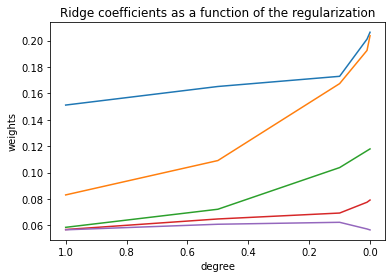

In [23]:
plot_coeffs(alphas,top_five_coeffs,'Ridge coefficients as a function of the regularization')

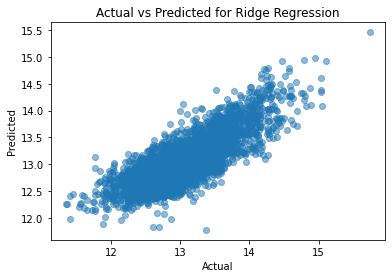

In [24]:
plot_predictions(all_predictions[best_index]["actual"].tolist(),all_predictions[best_index]["predicted"].tolist(),"Actual vs Predicted for Ridge Regression")

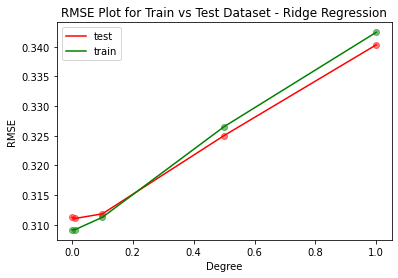

In [25]:
plot_rmse(alphas,all_rmse,all_rmse_train,"RMSE Plot for Train vs Test Dataset - Ridge Regression")

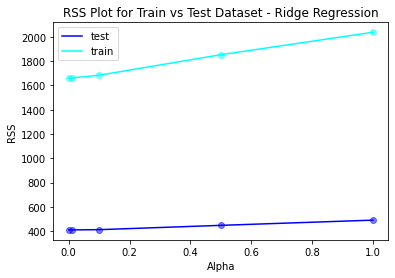

In [26]:
plot_rss(alphas,all_rss,all_rss_train,'RSS Plot for Train vs Test Dataset - Ridge Regression')

In [27]:
""" Elastic Net Regression """
elastic_alphas = [0.001,0.01,0.1,1,10]
elastic_all_coeffs = []
elastic_all_predictions = []
elastic_all_r2 = []
elastic_all_rss = []
elastic_all_rmse = []
elastic_all_rmse_train = []
elastic_all_r2_train = []
elastic_all_rss_train = []

for i in elastic_alphas :
  elastic_predictions, rmse_elastic_pred, r2_elastic, elastic_rss, elastic_rmse_train, elastic_r2_train, elastic_rss_train, elastic_coeff = do_elastic_net_regression(train_X, test_X, train_y, test_y,i)
  elastic_all_coeffs.append(elastic_coeff)
  elastic_all_predictions.append(elastic_predictions)
  elastic_all_r2.append(r2_elastic)
  elastic_all_rss.append(elastic_rss)
  elastic_all_rmse.append(rmse_elastic_pred)
  elastic_all_rmse_train.append(elastic_rmse_train)
  elastic_all_r2_train.append(elastic_r2_train)
  elastic_all_rss_train.append(elastic_rss_train)
  
elastic_best_rmse=min(elastic_all_rmse)
elastic_best_index = elastic_all_rmse.index(elastic_best_rmse)
print("Best Model : ")
print(elastic_best_rmse)
print(elastic_alphas[elastic_best_index])

Ridge value for alpha : 0.001
0.3110738361650642
409.22735350993366
0.001
Ridge value for alpha : 0.01
0.31191279450083137
411.4376819177612
0.01
Ridge value for alpha : 0.1
0.33169831273355954
465.29052616465754
0.1
Ridge value for alpha : 1
0.3585614860357167
543.7070487649702
1
Ridge value for alpha : 10
0.3683537125868229
573.8095710910005
10
Best Model : 
0.3110738361650642
0.001


In [28]:
print(elastic_all_coeffs[elastic_best_index])

[-3.61681320e-02  5.72335158e-03  3.18233654e-02  7.79448446e-02
  1.61942350e-01  5.54460577e-02  3.71772544e-02  2.06059214e-01
  1.16339061e-01  1.93924109e-07  4.48033620e-05  1.25665044e-04
  1.07369116e-04 -4.85760660e-07]


In [29]:
# extract top five features for ridge regression 
top_five_coeffs_elastic = []

for i in range(0,len(elastic_alphas)):
  top_five = elastic_all_coeffs[i].argsort()[::-1][:5]
  top_five_coeffs_elastic.append(elastic_all_coeffs[i][top_five])
print(top_five_coeffs_elastic)

[array([0.20605921, 0.16194235, 0.11633906, 0.07794484, 0.05544606]), array([0.20124227, 0.09753032, 0.06252051, 0.04769439, 0.02447464]), array([0.11376985, 0.00400754, 0.00026875, 0.00023977, 0.00015025]), array([2.55730901e-03, 3.22460297e-04, 3.13434524e-04, 1.95925615e-04,
       1.75478108e-07]), array([3.22741273e-04, 2.75307642e-04, 1.83576360e-04, 2.37391148e-07,
       0.00000000e+00])]


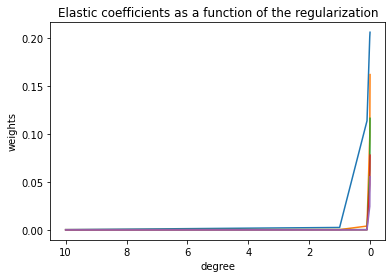

In [30]:
plot_coeffs(elastic_alphas,top_five_coeffs_elastic,'Elastic coefficients as a function of the regularization')

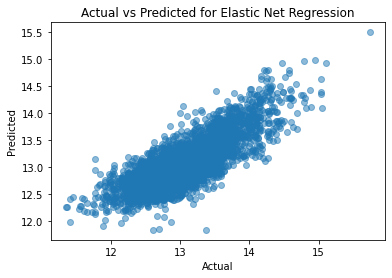

In [31]:
plot_predictions(elastic_all_predictions[elastic_best_index]["actual"].tolist(),elastic_all_predictions[elastic_best_index]["predicted"].tolist(),"Actual vs Predicted for Elastic Net Regression")

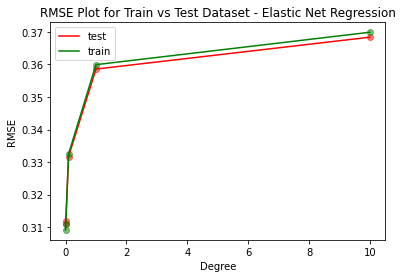

In [32]:
plot_rmse(elastic_alphas,elastic_all_rmse,elastic_all_rmse_train,"RMSE Plot for Train vs Test Dataset - Elastic Net Regression")

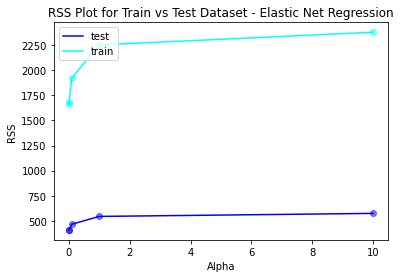

In [33]:
plot_rss(elastic_alphas,elastic_all_rss,elastic_all_rss_train,'RSS Plot for Train vs Test Dataset - Elastic Net Regression')

In [34]:
train_new_X = train_X[0:10000,:]
test_new_X = test_X[0:10000,:]
train_new_y = train_y[0:10000]
test_new_y = test_y[0:10000]

print(train_new_X.shape)
print(test_new_X.shape)
print(train_new_y.shape)
print(test_new_y.shape)

gamma_values = [0.1, 0.01, 0.001,0.0001,1]
kernel_degrees = [1]
kernel_cv_scores = []
kernel_all_coeffs = []
kernel_all_predictions = []
kernel_all_r2 = []
kernel_all_rss = []
kernel_all_rmse = []
kernel_all_rmse_train = []
kernel_all_r2_train = []
kernel_all_rss_train = []

for i in gamma_values:
  kernel_predictions, rmse_kernel_pred, r2_kernel, kernel_rss, kernel_rmse_train, kernel_r2_train, kernel_rss_train, kernel_coeffs,scores = do_kernel_regression(train_new_X, test_new_X, train_new_y, test_new_y,i)
  kernel_all_predictions.append(kernel_predictions)
  kernel_all_r2.append(r2_kernel)
  kernel_all_rss.append(kernel_rss)
  kernel_all_rmse.append(rmse_kernel_pred)
  kernel_all_rmse_train.append(kernel_rmse_train)
  kernel_all_r2_train.append(kernel_r2_train)
  kernel_all_rss_train.append(kernel_rss_train)
  
  weights_coeff = np.dot(train_new_X.transpose(),kernel_coeffs)
  
  kernel_all_coeffs.append(weights_coeff)
  kernel_cv_scores.append(np.mean(scores))


(10000, 14)
(4229, 14)
(10000,)
(4229,)
Cross Validation Score : 
[13.010093   13.04305185 13.01677423 13.05588649 13.04569961 13.04511016
 12.9891351  13.01772381 13.0031847  13.04439866]
10000
Cross Validation Score : 
[13.00363352 13.03857722 13.01604033 13.04495939 13.03658962 13.04503232
 12.98039458 13.00611409 13.00236884 13.04000359]
10000
Cross Validation Score : 
[12.96698528 12.99276436 12.97338444 13.00664865 13.0026344  13.02163718
 12.92356083 12.97789688 12.95654598 12.97188576]
10000
Cross Validation Score : 
[12.1819773  12.33865526 12.21283879 12.32001219 12.32360074 12.34432159
 12.14771465 12.23181368 12.19643339 12.30382331]
10000
Cross Validation Score : 
[13.01010275 13.04731965 13.02680045 13.06695798 13.05065128 13.04511016
 12.99456755 13.03270141 13.00860557 13.04880722]
10000


In [35]:
best_index = kernel_all_rmse.index(min(kernel_all_rmse))
best_kernel_gamma = gamma_values[best_index]
print("Best Degree : ")
print(best_kernel_gamma)
print(kernel_all_rmse)

Best Degree : 
0.0001
[13.017438883012563, 13.014201203022628, 12.97784381233329, 12.260590996032967, 13.04562887727765]


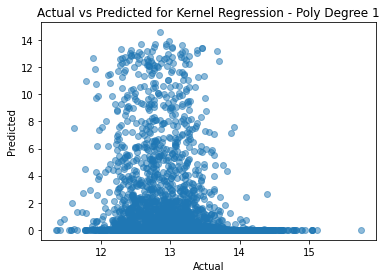

In [36]:
plot_predictions(kernel_all_predictions[best_index]["actual"].tolist(),kernel_all_predictions[best_index]["predicted"].tolist(),"Actual vs Predicted for Kernel Regression - Poly Degree 1")